[Local](./ch08.ipynb),
[Github](https://github.com/renyuanL/_ryDsp2020/blob/master/code/ch08.ipynb),
[Colab](https://colab.research.google.com/github/renyuanL/_ryDsp2020/blob/master/code/ch08.ipynb)

[TextBook@greenteapress](http://greenteapress.com/thinkdsp/html/thinkdsp009.html)

# Chapter 8  Filtering and Convolution

In this chapter I present one of the most important and useful ideas related to signal processing: the Convolution Theorem. But before we can understand the Convolution Theorem, we have to understand convolution. I’ll start with a simple example, smoothing, and we’ll go from there.

The code for this chapter is in chap08.ipynb, which is in the repository for this book (see Section 0.2). You can also view it at http://tinyurl.com/thinkdsp08.

## 8.1  Smoothing

![](http://greenteapress.com/thinkdsp/html/thinkdsp040.png)

Figure 8.1: Daily closing price of Facebook stock and a 30-day moving average.

Smoothing is an operation that tries to remove short-term variations from a signal in order to reveal long-term trends. For example, if you plot daily changes in the price of a stock, it would look noisy; a smoothing operator might make it easier to see whether the price was generally going up or down over time.

A common smoothing algorithm is a moving average, which computes the mean of the previous n values, for some value of n.

For example, Figure 8.1 shows the daily closing price of Facebook from May 17, 2012 to December 8, 2015. The gray line is the raw data, the darker line shows the 30-day moving average. Smoothing removes the most extreme changes and makes it easier to see long-term trends.

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import scipy.signal as sg

np.set_printoptions(precision=3, suppress=True)

df= pd.read_csv('fb.csv')
df.head(), df.tail()

(       Date    Open    High     Low   Close    Volume
 0  8-Dec-15  104.00  106.91  103.95  106.49  20401791
 1  7-Dec-15  106.48  106.83  104.66  105.61  15474890
 2  4-Dec-15  104.75  107.73  104.11  106.18  21224721
 3  3-Dec-15  103.95  106.85  103.35  104.38  23236485
 4  2-Dec-15  107.00  107.92  105.79  106.07  24429063,
           Date   Open   High    Low  Close     Volume
 891  23-May-12  31.37  32.50  31.36  32.00   73721135
 892  22-May-12  32.61  33.59  30.94  31.00  102053826
 893  21-May-12  36.53  36.66  33.00  34.03  168309831
 894  18-May-12  42.05  45.00  38.00  38.23  580587742
 895  17-May-12      -      -      -  38.00          0)

In [7]:
df.columns
df.Close

(896,)

In [3]:
type(df.Close) # pandas.core.series.Series
type(df.Close.values) # numpy.ndarray
df.Close.describe()

count    896.000000
mean      56.718538
std       25.956683
min       17.730000
25%       28.105000
50%       59.605000
75%       77.912500
max      109.010000
Name: Close, dtype: float64

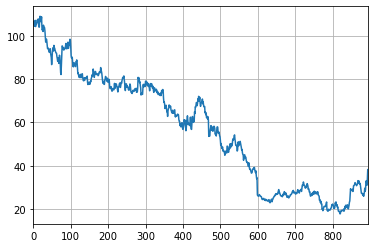

In [9]:
df.Close.plot(grid=True)

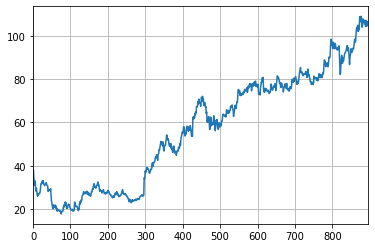

In [5]:
x= df.Close.values[::-1] # 序列顛倒 inverse the series
#pl.plot(x);pl.grid(True)

sx= pd.Series(x) # pandas 裡面有 2大資料結構，Series, DataFrame
sx.plot(grid=True)

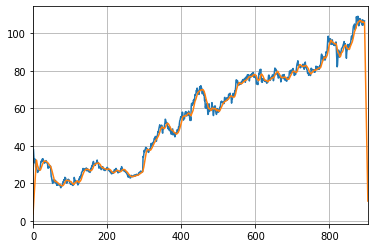

In [6]:
nDays= 10
win=   np.ones(nDays)/nDays

Ma= np.convolve(x, win) # x vonvolve win ==  Moving Ave sig

sMa= pd.Series(Ma) # pandas 裡面有 2大資料結構，Series, DataFrame

sx.plot(grid=True)
sMa.plot(grid=True)


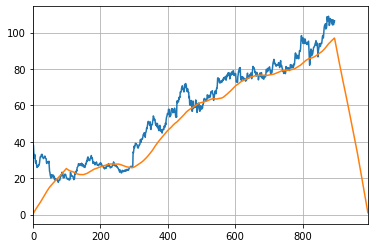

In [7]:
nDays= 100
win=   np.ones(nDays)/nDays

Ma= np.convolve(x, win)

sMa= pd.Series(Ma) # pandas 裡面有 2大資料結構，Series, DataFrame

sx.plot(grid=True)
sMa.plot(grid=True)


In [8]:
# to improve the "boundary condition", we can change the `mode` of the convolve()
# np.convolve?


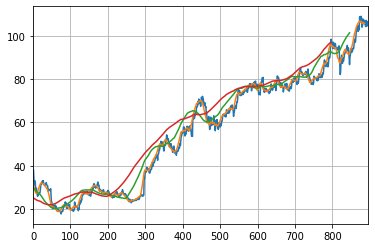

In [9]:
sx.plot(grid=True)

for nDays in [10,50,100]:
    win=   np.ones(nDays)/nDays
    Ma= np.convolve(x, win, mode='valid')
    sMa= pd.Series(Ma) 
    sMa.plot(grid=True)

Smoothing operations also apply to sound signals. As an example, I’ll start with a square wave at 440 Hz. As we saw in Section 2.2, the harmonics of a square wave drop off slowly, so it contains many high-frequency components.

```python
    signal = thinkdsp.SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    segment = wave.segment(duration=0.01)
```

wave is a 1-second segment of the signal; segment is a shorter segment I’ll use for plotting.

To compute the moving average of this signal, I’ll create a window with 11 elements and normalize it so the elements add up to 1.

```python
    window = np.ones(11)
    window /= sum(window)
```

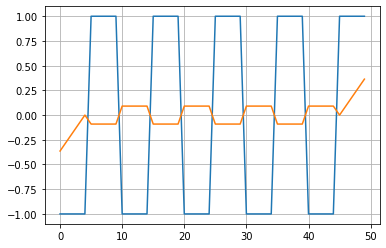

In [10]:
import thinkdsp as td

s= td.SquareSignal(freq=100)
x= s.make_wave(duration=.05, framerate=1000)
x= x.ys

win= np.ones(11)/11

y= np.convolve(win, x, mode='same')

pl.plot(x)
pl.plot(y)
pl.grid(True)

Now I can compute the average of the first 11 elements by multiplying the window by the wave array:

```python
    ys = segment.ys
    N = len(ys)
    padded = thinkdsp.zero_pad(window, N)
    prod = padded * ys
    sum(prod)
```
padded is a version of the window with zeros added to the end so it has the same length as segment.ys prod is the product of the window and the wave array.

The sum of the elementwise products is the average of the first 11 elements of the array. Since these elements are all -1, their average is -1.

![](http://greenteapress.com/thinkdsp/html/thinkdsp041.png)
Figure 8.2: A square signal at 400 Hz (gray) and an 11-element moving average.

To compute the next element of the smoothed signal, we shift the window to the right and compute the average of the next 11 elements of the wave array, starting with the second.

```python
    rolled = np.roll(rolled, 1)
    prod = rolled * ys
    sum(prod)
```
The result is -1 again. 

In [11]:
win= np.concatenate( (np.ones(4), 
                      np.zeros(4))
                    )
win

array([1., 1., 1., 1., 0., 0., 0., 0.])

In [12]:
win= np.roll(win, shift=1)
win

array([0., 1., 1., 1., 1., 0., 0., 0.])

In [13]:
np.zeros_like?

To compute the `moving average`, we repeat this process and store the result in an array named smoothed:

```python
    smoothed = np.zeros_like(ys)
    rolled = padded
    for i in range(N):
        smoothed[i] = sum(rolled * ys)
        rolled = np.roll(rolled, 1)
```

rolled is a copy of padded that gets shifted to the right by one element each time through the loop. Inside the loop, we multiply the segment by rolled to select 11 elements, and then add them up.

Figure 8.2 shows the result. The gray line is the original signal; the darker line is the smoothed signal. The smoothed signal starts to ramp up when the leading edge of the window reaches the first transition, and levels off when the window crosses the transition. As a result, the transitions are less abrupt, and the corners less sharp. If you listen to the smoothed signal, it sounds less buzzy and slightly muffled.

## 8.2  Convolution

The operation we just computed is called `convolution`, and it is such a common operation that NumPy provides an implementation that is simpler and faster than my version:

```python
    convolved = np.convolve(ys, window, mode='valid')
    smooth2 = thinkdsp.Wave(convolved, framerate=wave.framerate)
```

np.convolve computes the convolution of the wave array and the window. The mode flag valid indicates that it should only compute values when the window and the wave array overlap completely, so it stops when the right edge of the window reaches the end of the wave array. Other than that, the result is the same as in Figure 8.2.

Discrete convolution @ Wikipedia

https://en.wikipedia.org/wiki/Convolution#Discrete_convolution


The `Cauchy product` of these two power series is defined by a discrete convolution as follows:

https://en.wikipedia.org/wiki/Cauchy_product#Cauchy_product_of_two_power_series

$
{\displaystyle 
\left(\sum_{i=0}^{\infty }a_{i}x^{i}\right)
\cdot 
\left(\sum_{j=0}^{\infty }b_{j}x^{j}\right)
=\sum_{n=0}^{\infty }c_{n}x^{n}}   
$

where     
$
{\displaystyle c_{n}=\sum_{k=0}^{n}a_{k}b_{n-k}}
$

----

$
{\displaystyle 
\left(\sum_{i=0}^{\infty }a_{i}x^{i}\right)
\cdot 
\left(\sum_{j=0}^{\infty }b_{j}x^{j}\right)
}
\\
=
\\
{\displaystyle 
\sum_{n=0}^{\infty} 
\left(
\sum_{k=0}^{n} a_{k} b_{n-k}
\right)
x^{n} 
}
$

Actually, there is one other difference. The loop in the previous section actually computes `cross-correlation`:

$
(f ⋆ g)[n] = \sum_{m=0}^{N-1} f[m] \cdot g[n+m]	
$

where f is a wave array with length N, g is the window, and `⋆` is the symbol for cross-correlation. To compute the nth element of the result, we shift g to the right, which is why the index is n+m.

In [14]:
f= np.array([1,2,3,4])
g= np.array([1,1,1,1])

# (f⋆g)[n]
# for n in [0,1,2,3]
np.dot(f[:],  g[0:]),\
np.dot(f[:-1],g[1:]),\
np.dot(f[:-2],g[2:]),\
np.dot(f[:-3],g[3:])

(10, 6, 3, 1)

The definition of `convolution` is slightly different:

$
(f * g)[n] = \sum_{m=0}^{N-1} f[m] \cdot g[n-m]	
$

The symbol `∗` represents convolution. 

In [15]:
# (f*g)[n]
# for n in [0,1,2,3]
np.dot(f[0:1],g[0::-1]),\
np.dot(f[0:2],g[1::-1]),\
np.dot(f[0:3],g[2::-1]),\
np.dot(f[0:],g[3::-1]),
#np.dot(f[0:],g[4::-1]),  ### difficult n>=4


(1, 3, 6, 10)

The difference is in the index of g: m has been negated, so the summation iterates the elements of g backward (assuming that negative indices wrap around to the end of the array).

Because the `window` we used in this example is `symmetric`, `cross-correlation and convolution` yield the same result. When we use other windows, we will have to be more careful.

You might wonder why convolution is defined the way it is. There are two reasons:

This definition comes up naturally for several applications, especially analysis of signal-processing systems, which is the topic of Chapter 10.

Also, this definition is the basis of the Convolution Theorem, coming up very soon.

Here is Renyuan Lyu's viewpoint:
`the polynomial multiplication`:

$
(f_0+f_1 x^1+f_2 x^2+f_3 x^3) \cdot (g_0+g_1 x^1+g_2 x^2+g_3 x^3)
= (h_0+h_1 x^1+h_2 x^2+h_3 x^3+h_4 x^4+h_5 x^5+h_6 x^6) 
$

$
h_0 = f_0 \cdot g_0 \\
h_1 = f_0 \cdot g_1 + f_1 \cdot g_0  \\
h_2 = f_0 \cdot g_2 + f_1 \cdot g_1 + f_2 \cdot g_0 \\
h_3 = f_0 \cdot g_3 + f_1 \cdot g_2 + f_2 \cdot g_1 + f_3 \cdot g_0 \\
h_4 = f_1 \cdot g_3 + f_2 \cdot g_2 + f_3 \cdot g_1 \\
h_5 = f_2 \cdot g_3 + f_3 \cdot g_2 \\
h_6 = f_3 \cdot g_3
$

----

$
h[n]=\sum_{m=0}^{n} f[m] \cdot g[n-m]
$

In [2]:
import numpy as np
m= np.arange(4).reshape(1,-1)
n= np.arange(4).reshape(-1,1)

f= np.array([1,2,3,4])
g= np.array([1,1,1,1])
f=np.concatenate((f,np.zeros(3)))
g=np.concatenate((g,np.zeros(3)))

h= (f[m]*g[n-m]).sum(axis=1)
h

array([ 1.,  3.,  6., 10.])

In [6]:
np.convolve(f,g,mode='full'),\
np.convolve?

In [ ]:
np.convolve(f,g,mode='full'),\
np.convolve

## 8.3  The frequency domain

![](http://greenteapress.com/thinkdsp/html/thinkdsp042.png)
Figure 8.3: Spectrum of the square wave before and after smoothing.

Smoothing makes the transitions in a square signal less abrupt, and makes the sound slightly muffled. Let’s see what effect this operation has on the spectrum. First I’ll plot the spectrum of the original wave:

```python
    spectrum = wave.make_spectrum()
    spectrum.plot(color=GRAY)
```

Then the smoothed wave:

```python
    convolved = np.convolve(wave.ys, window, mode='same')
    smooth = thinkdsp.Wave(convolved, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()
    spectrum2.plot()
```

The mode flag same indicates that the result should have the same length as the input. In this example, it will include a few values that “wrap around”, but that’s ok for now.

Figure 8.3 shows the result. The fundamental frequency is almost unchanged; the first few harmonics are attenuated, and the higher harmonics are almost eliminated. So smoothing has the effect of a low-pass filter, which we saw in Section 1.5 and Section 4.4.

To see how much each component has been attenuated, we can compute the ratio of the two spectrums:

```python
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps
    ratio[amps<560] = 0
    plt.plot(ratio)
```

ratio is the ratio of the amplitude before and after smoothing. When amps is small, this ratio can be big and noisy, so for simplicity I set the ratio to 0 except where the harmonics are.

![](http://greenteapress.com/thinkdsp/html/thinkdsp043.png)
Figure 8.4: Ratio of spectrums for the square wave, before and after smoothing.

Figure 8.4 shows the result. As expected, the ratio is high for low frequencies and drops off at a cutoff frequency near 4000 Hz. But there is another feature we did not expect: above the cutoff, the ratio bounces around between 0 and 0.2. What’s up with that?

## 8.4  The convolution theorem

![](http://greenteapress.com/thinkdsp/html/thinkdsp044.png)
Figure 8.5: Ratio of spectrums for the square wave, before and after smoothing, along with the DFT of the smoothing window.

The answer is the convolution theorem. Stated mathematically:

$
DFT(f ∗ g) = DFT(f) · DFT(g) 
$

where f is a wave array and g is a window. 

In words, the convolution theorem says that if we convolve f and g, and then compute the DFT, we get the same answer as computing the DFT of f and g, and then multiplying the results element-wise. More concisely, convolution in the time domain corresponds to multiplication in the frequency domain.

And that explains Figure 8.4, because when we convolve a wave and a window, we multiply the spectrum of the wave with the spectrum of the window. To see how that works, we can compute the DFT of the window:

```python
    padded = zero_pad(window, N)
    dft_window = np.fft.rfft(padded)
    plt.plot(abs(dft_window))
```

padded contains the window, padded with zeros to be the same length as wave. dft_window contains the DFT of the smoothing window.

Figure 8.5 shows the result, along with the ratios we computed in the previous section. The ratios are exactly the amplitudes in dft_window. Mathematically:

$
{abs(DFT(f ∗ g)) \over abs(DFT(f))} = abs(DFT(g)) 
$

In this context, the DFT of a window is called a `filter`. 

For any convolution window in the time domain, there is a corresponding filter in the frequency domain. And for any filter than can be expressed by element-wise multiplication in the frequency domain, there is a corresponding window.

## 8.5  Gaussian filter

![](http://greenteapress.com/thinkdsp/html/thinkdsp045.png)
Figure 8.6: Boxcar and Gaussian windows.

The moving average window we used in the previous section is a low-pass filter, but it is not a very good one. The DFT drops off steeply at first, but then it bounces around. Those bounces are called `sidelobes`, and they are there because the moving average window is like a square wave, so its spectrum contains high-frequency harmonics that drop off proportionally to 1/f, which is relatively slow.

We can do better with a `Gaussian window`. SciPy provides functions that compute many common convolution windows, including gaussian:

```python
    gaussian = scipy.signal.gaussian(M=11, std=2)
    gaussian /= sum(gaussian)
```

M is the number of elements in the window; std is the standard deviation of the Gaussian distribution used to compute it. Figure 8.6 shows the shape of the window. It is a discrete approximation of the Gaussian “bell curve”. The figure also shows the moving average window from the previous example, which is sometimes called a boxcar window because it looks like a rectangular railway car.

![](http://greenteapress.com/thinkdsp/html/thinkdsp046.png)
Figure 8.7: Ratio of spectrums before and after Gaussian smoothing, and the DFT of the window.

I ran the computations from the previous sections again with this curve, and generated Figure 8.7, which shows the ratio of the spectrums before and after smoothing, along with the DFT of the Gaussian window.

As a low-pass filter, Gaussian smoothing is better than a simple moving average. After the ratio drops off, it stays low, with almost none of the sidelobes we saw with the boxcar window. So it does a better job of cutting off the higher frequencies.

The reason it does so well is that the DFT of a Gaussian curve is also a Gaussian curve. So the ratio drops off in proportion to $e^{−f2}$, which is much faster than ${1 \over f}$.

https://en.wikipedia.org/wiki/Gaussian_filter


In [1]:
import scipy.signal
scipy.signal.gaussian?


## 8.6  Efficient convolution

One of the reasons the FFT is such an important algorithm is that, combined with the Convolution Theorem, it provides an efficient way to compute convolution, cross-correlation, and autocorrelation.

Again, the Convolution Theorem states

$
DFT(f ∗ g) = DFT(f) · DFT(g) 
$

So one way to compute a convolution is:

$
f ∗ g = IDFT(DFT(f) · DFT(g)) 
$

where IDFT is the inverse DFT. A simple implementation of convolution takes time proportional to N2; this algorithm, using FFT, takes time proportional to $N logN$.

We can confirm that it works by computing the same convolution both ways. As an example, I’ll apply it to the BitCoin data shown in Figure 8.1.

```python
    df = pandas.read_csv('coindesk-bpi-USD-close.csv',
                         nrows=1625,
                         parse_dates=[0])
    ys = df.Close.values
```

This example uses Pandas to read the data from the CSV file (included in the repository for this book). If you are not familiar with Pandas, don’t worry: I’m not going to do much with it in this book. But if you’re interested, you can learn more about it in Think Stats at http://thinkstats2.com.

The result, df, is a DataFrame, one of the data structures provided by Pandas. ys is a NumPy array that contains daily closing prices.

Next I’ll create a Gaussian window and convolve it with ys:

```python
    window = scipy.signal.gaussian(M=30, std=6)
    window /= window.sum()
    smoothed = np.convolve(ys, window, mode='valid')
```

fft_convolve computes the same thing using FFT:

from np.fft import fft, ifft

```python
def fft_convolve(signal, window):
    fft_signal = fft(signal)
    fft_window = fft(window)
    return ifft(fft_signal * fft_window)
```    
We can test it by padding the window to the same length as ys and then computing the convolution:

```python
    padded = zero_pad(window, N)
    smoothed2 = fft_convolve(ys, padded)
```

The result has M−1 bogus values at the beginning, where M is the length of the window. If we slice off the bogus values, the result agrees with fft_convolve with about 12 digits of precision.

```python
    M = len(window)
    smoothed2 = smoothed2[M-1:]
```

## 8.7  Efficient autocorrelation

http://greenteapress.com/thinkdsp/html/thinkdsp047.png
Figure 8.8: Autocorrelation functions computed by NumPy and fft_correlate.

In Section 8.2 I presented definitions of cross-correlation and convolution, and we saw that they are almost the same, except that in convolution the window is reversed.

Now that we have an efficient algorithm for convolution, we can also use it to compute cross-correlations and autocorrelations. Using the data from the previous section, we can compute the autocorrelation Facebook stock prices:

corrs = np.correlate(close, close, mode='same')
With mode=’same’, the result has the same length as close, corresponding to lags from −N/2 to N/2−1. The gray line in Figure 8.8 shows the result. Except at lag=0, there are no peaks, so there is no apparent periodic behavior in this signal. However, the autocorrelation function drops off slowly, suggesting that this signal resembled pink noise, as we saw in Section 5.3.

To compute autocorrelation using convolution, have to zero-pad the signal to double the length. This trick is necessary because the FFT is based on the assumption that the signal is periodic; that is, that it wraps around from the end to the beginning. With time-series data like this, that assumption is invalid. Adding zeros, and then trimming the results, removes the bogus values.

Also, remember that convolution reverse the direction of the window. In order to cancel that effect, we reverse the direction of the window before calling fft_convolve, using np.flipud, which flips a NumPy array. The result is a view of the array, not a copy, so this operation is fast.

```python
def fft_autocorr(signal):
    N = len(signal)
    signal = thinkdsp.zero_pad(signal, 2*N)
    window = np.flipud(signal)

    corrs = fft_convolve(signal, window)
    corrs = np.roll(corrs, N//2+1)[:N]
    return corrs
```

The result from fft_convolve has length 2N. Of those, the first and last N/2 are valid; the rest are the result of zero-padding. To select the valid element, we roll the results and select the first N, corresponding to lags from −N/2 to N/2−1.

As shown in Figure 8.8 the results from fft_autocorr and np.correlate are identical (with about 9 digits of precision).

Notice that the correlations in Figure 8.8 are large numbers; we could normalize them (between -1 and 1) as shown in Section 5.6.

The strategy we used here for auto-correlation also works for cross-correlation. Again, you have to prepare the signals by flipping one and padding both, and then you have to trim the invalid parts of the result. This padding and trimming is a nuisance, but that’s why libraries like NumPy provide functions to do it for you.

## 8.8  Exercises

Solutions to these exercises are in chap08soln.ipynb.

- Exercise 1   

The notebook for this chapter is chap08.ipynb. Read through it and run the code.
It contains an interactive widget that lets you experiment with the parameters of the Gaussian window to see what effect they have on the cutoff frequency.

What goes wrong when you increase the width of the Gaussian, std, without increasing the number of elements in the window, M?

- Exercise 2   

In this chapter I claimed that the Fourier transform of a Gaussian curve is also a Gaussian curve. For discrete Fourier transforms, this relationship is approximately true.

Try it out for a few examples. What happens to the Fourier transform as you vary std?

- Exercise 3   

If you did the exercises in Chapter 3, you saw the effect of the Hamming window, and some of the other windows provided by NumPy, on spectral leakage. We can get some insight into the effect of these windows by looking at their DFTs.

In addition to the Gaussian window we used in this window, create a Hamming window with the same size. Zero pad the windows and plot their DFTs. Which window acts as a better low-pass filter? You might find it useful to plot the DFTs on a log-y scale.

Experiment with a few different windows and a few different sizes.